# How to set a mask on a shell?

`set_mask_on_shell` allows to check if our shell nodes are located within a given distance of any point of a given cloud of points. If a node is located within the tolerance, then it takes the value 0 (otherwise, 1). This is what we call **set a mask on a shell**.

In [1]:
import numpy as np
import pyvista as pv
from pyvista.utilities.fileio import from_meshio

from kokiy import CartShell

pv.global_theme.background = 'white'
pv.global_theme.font.color = 'black'
pv.global_theme.cmap = 'coolwarm'
pv.set_jupyter_backend('static')

np.random.seed(1)


n_trans, n_longi = 6, 8
zero = np.zeros((3,))
u_max = np.array([1., 0., 0.])
v_max = np.array([0., 1., 0.])
shell = CartShell(n_trans, n_longi, zero, u_max, v_max)

Let's start by defining a random cloud of points.

In [2]:
point_cloud = np.random.random((5, 3))

Now, we can set the mask on a shell.

In [3]:
mask = shell.set_mask_on_shell(point_cloud, tol=.1)

Here a quick visualization of what we've done (the cloud points are represented with green color):

In [4]:
pv_point_cloud = pv.PolyData(point_cloud)

mesh = from_meshio(shell.get_mesh('quad'))
mesh['mask'] = mask.reshape(-1)

pl = pv.Plotter(notebook=True)
pl.add_mesh(mesh, show_edges=True)
pl.add_axes()
pl.view_xy()

pl.add_mesh(point_cloud, render_points_as_spheres=True,
           color='green', point_size=20)

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLActor)0x7fa693afd9a0

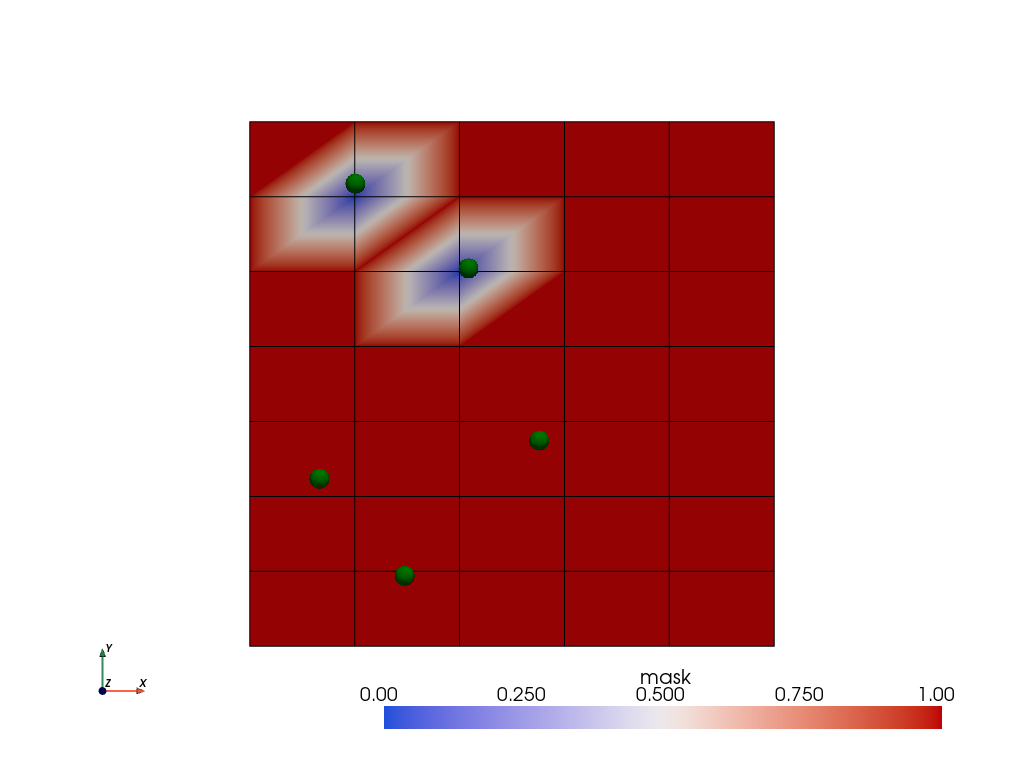

In [5]:
pl.show()